In [1]:
from trade_bot import TradeBot, Trade
from strategy import Strategy

# Creating A Strategy

In [2]:
import typing
import numpy as np
from trade_bot import Trade

class Sheep(Strategy):
    """
    Simple Strategy that just does whatever the market is doing.
    """
    def play(
        self,
        *,
        cash: float,
        shares: int,
        timestamp,
        open: float,
        high: float,
        low: float,
        close: float,
        volume: int,
        dividends: float,
        stock_splits: float,
        **kwargs
    ) -> typing.Optional[Trade]:
        """Implements the trading strategy logic based on historical and current market data.

        This method is the core of your trading strategy. It receives various data points.
        and the current state of the TradeBot to make trading decisions.

        Args:
            ticker_name (str): The name of the stock ticker symbol.
            cash (float): The current cash balance of the TradeBot.
            shares (int): The current number of shares held by the TradeBot for this stock.
            timestamp (pd._libs.tslibs.timestamps.Timestamp): The datetime of the current data point.
            open_ (float): The opening price of the stock on that date.
            high (float): The highest price of the stock on that date.
            low (float): The lowest price of the stock on that date.
            close (float): The closing price of the stock on that date.
            volume (int): The trading volume for that date.
            dividends (float): Any dividends distributed for that date (usually 0).
            stock_split (float): Any stock split factor for that date (usually 1).
            **kwargs (dict): Optional keyword arguments that may be passed by the TradeBot.play method.

        Returns:
            typing.Optional[Trade]:
                - Returns a `Trade` object if the strategy decides to execute a trade (BUY or SELL).
                - Returns `None` if the strategy chooses not to trade at this point.

        **Note:** Subclasses implementing specific trading strategies must define their own logic
        within this method to analyze the provided data and make trading decisions.
        """
        if open < close:
            # Stock is rising; BUY
            shares = (cash // 2) // close
            # Use half my cash to buy shares at closing price; trade expires after 5 iterations
            return Trade.buy(shares, close, timestamp, 5)
        elif open > close:
            # Stock is dropping; SELL
            shares = int(np.ceil(shares / 2))
            # Sell half shares at closing price; trade expires after 5 iterations
            return Trade.sell(shares, close, timestamp, 5)
        else:
            # Don't make a Trade
            return None

# Testing a Strategy

In [3]:
bot = TradeBot()
bot.deposit(1000)

In [4]:
sheep = Sheep()

In [10]:
bot.play(
    strategy=sheep,
    ticker_name="aapl",
    period="5d",
    interval="1m"
)

Starting Net Worth: Cash: 307.3733673095703, Shares: 4.0 @ 171.0 = 991.3733673095703
Ending Net Worth: Cash: 304.4544677734375, Shares: 4.0 @ 171.0 = 994.7344970703125
Your Net Worth changed  0.64%.
The Stock Prick changed  0.92%.


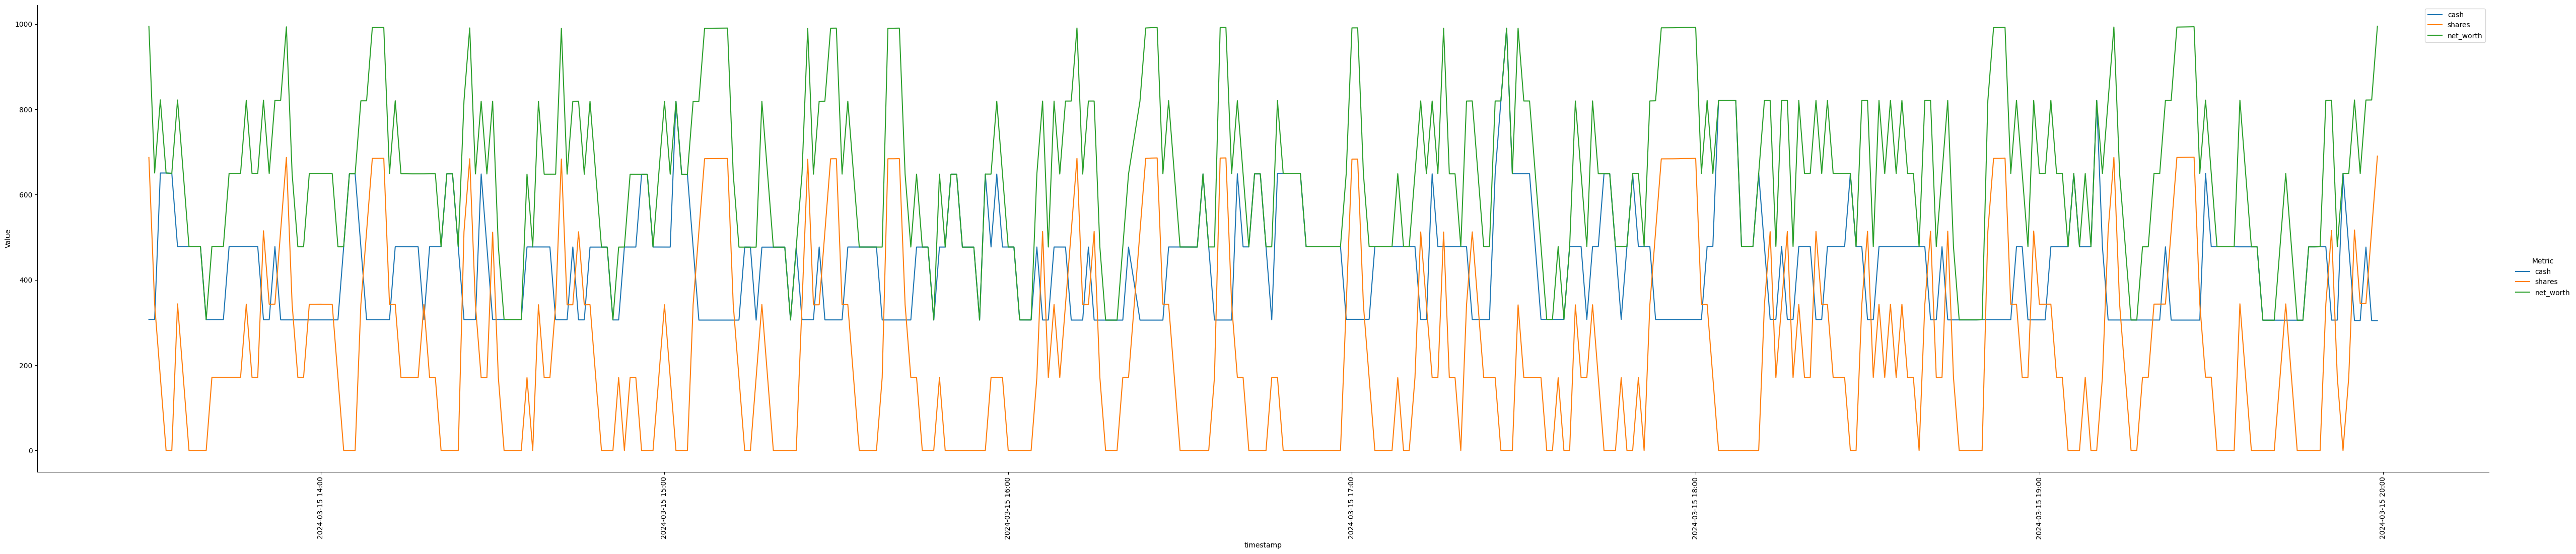

In [12]:
bot.plot_history()

In [11]:
len(bot.completed_trades)

1909